In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
# Load the training data
df_train = pd.read_csv('Train.csv')
# Load the test data
df_test = pd.read_csv('Test.csv')

In [309]:
df_train.head()

,w,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,35381,>35,Yes,Other,1,Man,Yes,NotDev,35,15,United Kingdom of Great Britain and Northern I...,77556.0,C;C++;Go;PowerShell;Python;Ansible;Chef;Docker...,16,0
1,1453,>35,No,PhD,0,Man,No,Dev,35,30,United Kingdom of Great Britain and Northern I...,124092.0,C#;HTML/CSS;LISP;ASP.NET Core ;jQuery;Microsof...,7,1
2,24572,<35,No,Master,1,NonBinary,Yes,Dev,18,2,Denmark,78672.0,Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL...,12,1
3,42014,<35,No,Undergraduate,1,Man,Yes,Dev,10,1,France,44790.0,Rust;Docker;Kubernetes;AWS;Google Cloud;MongoD...,7,0
4,26711,>35,No,Master,0,Man,No,Dev,21,17,United Kingdom of Great Britain and Northern I...,155112.0,C#;HTML/CSS;JavaScript;Node.js;SQL;TypeScript;...,16,1


In [310]:
df_train.drop(['w'], axis=1, inplace=True)

In [311]:
#What correlates the most with "employed" column?
df.corr()['Employed'].sort_values()

C:\Users\Simon\AppData\Local\Temp\ipykernel_14040\1276420888.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Employed'].sort_values()


Employment       -0.010255
YearsCode        -0.008982
YearsCodePro     -0.001812
PreviousSalary    0.002171
ComputerSkills    0.586196
Employed          1.000000
Name: Employed, dtype: float64

# Random forest

In [312]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [313]:
# Step 1: Load your data
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

In [314]:
# Step 1,5. We manually convert the age column to binary, as this is not caught by the one-hot encoder
train_df['Age_over_35'] = train_df['Age'].apply(lambda x: 1 if x == '>35' else 0)
test_df['Age_over_35'] = test_df['Age'].apply(lambda x: 1 if x == '>35' else 0)

In [315]:
# Step 2: Identify categorical columns that need to be encoded
categorical_cols = ['EdLevel', 'Gender', 'MainBranch']
numerical_cols = ['YearsCode', 'YearsCodePro', 'PreviousSalary', 'ComputerSkills','Age_over_35']

In [316]:
# Step 3: Create a ColumnTransformer to transform the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


In [317]:
# Step 4: Create a pipeline that includes the preprocessor and the Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [318]:
# Step 5: Separate features and target variable
X_train = train_df.drop('Employed', axis=1)  
X_train = train_df[categorical_cols + numerical_cols]
y_train = train_df['Employed']
X_test = test_df[categorical_cols + numerical_cols]
y_test = test_df['Employed']

In [319]:
# Step 6: Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = pipeline.predict(X_test)

In [320]:
# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')  # Adjust based on your target variable
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.7577022550932438
F1 Score: 0.7769050802139037
Precision: 0.7656455862977603
Recall: 0.7885006784260515


In [321]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

"""
# Define the hyperparameters and their possible values
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_"""

"\n# Define the hyperparameters and their possible values\nparam_grid = {\n    'classifier__n_estimators': [50, 100, 200],\n    'classifier__max_depth': [None, 10, 20],\n    'classifier__min_samples_split': [2, 5, 10],\n    'classifier__min_samples_leaf': [1, 2, 4]\n}\n\n# Create a GridSearchCV object\ngrid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)\n\n# Fit the grid search to your data\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters and model\nbest_params = grid_search.best_params_\nbest_model = grid_search.best_estimator_"

In [322]:
"""#Print the best parameters and model
print(f"Best Parameters: {best_params}")
print(f"Best Model: {best_model}")"""

'#Print the best parameters and model\nprint(f"Best Parameters: {best_params}")\nprint(f"Best Model: {best_model}")'

Output: Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Age', 'EdLevel', 'Gender',
                                                   'MainBranch'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=42))])

### Tuned model

In [323]:
# Step 4: Create a pipeline that includes the preprocessor and the Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42))
])

# Step 6: Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary') 
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.7834293751985117
F1 Score: 0.8025482976875026
Precision: 0.7834585251595186
Recall: 0.8225915875169606


#### Further tuned model

In [324]:
"""# Define the hyperparameters and their possible values
param_grid = {
    'classifier__n_estimators': [85, 100, 115],
    'classifier__max_depth': [7, 10, 13],
    'classifier__min_samples_split': [10, 12, 15],
    'classifier__min_samples_leaf': [4, 6, 8]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_"""

"# Define the hyperparameters and their possible values\nparam_grid = {\n    'classifier__n_estimators': [85, 100, 115],\n    'classifier__max_depth': [7, 10, 13],\n    'classifier__min_samples_split': [10, 12, 15],\n    'classifier__min_samples_leaf': [4, 6, 8]\n}\n\n# Create a GridSearchCV object\ngrid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)\n\n# Fit the grid search to your data\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters and model\nbest_params = grid_search.best_params_\nbest_model = grid_search.best_estimator_"

In [325]:
"""#Print the best parameters and model
print(f"Best Parameters: {best_params}")
print(f"Best Model: {best_model}")"""

'#Print the best parameters and model\nprint(f"Best Parameters: {best_params}")\nprint(f"Best Model: {best_model}")'

In [326]:
# Step 4: Create a pipeline that includes the preprocessor and the Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=13, min_samples_leaf=6, min_samples_split=15, n_estimators=115, random_state=42))
])

# Step 6: Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary') 
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.7837923680747765
F1 Score: 0.8030747613340496
Precision: 0.7832325675130996
Recall: 0.8239484396200815


In [327]:
# Define the hyperparameters and their possible values
param_grid = {
    'classifier__min_samples_split': [15, 30, 50]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [328]:
#Print the best parameters and model
print(f"Best Parameters: {best_params}")
print(f"Best Model: {best_model}")

Best Parameters: {'classifier__min_samples_split': 15}
Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['YearsCode', 'YearsCodePro',
                                                   'PreviousSalary',
                                                   'ComputerSkills',
                                                   'Age_over_35']),
                                                 ('cat', OneHotEncoder(),
                                                  ['EdLevel', 'Gender',
                                                   'MainBranch'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=13, min_samples_leaf=6,
                                        min_samples_split=15, n_estimators=115,
                                        random_state=42))])


### Feature importance

In [329]:
# Get feature importances from the classifier
feature_importances = best_model.named_steps['classifier'].feature_importances_

# Get feature names for categorical features from the preprocessor step of the pipeline
# The OneHotEncoder step is named 'cat' in the ColumnTransformer
# We use get_feature_names_out() to get the feature names and then convert to a list
categorical_feature_names = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()

# The numerical feature names are used directly
numerical_feature_names = numerical_cols  # This is already a list

# Combine numerical and categorical feature names
feature_names = numerical_feature_names + categorical_feature_names

# Create a DataFrame to display feature importances
feature_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances}).sort_values('importance', ascending=False)
feature_df.head(16)


,feature,importance
3,ComputerSkills,0.870282
2,PreviousSalary,0.036305
0,YearsCode,0.023461
1,YearsCodePro,0.022077
8,EdLevel_PhD,0.010171
14,MainBranch_NotDev,0.009903
13,MainBranch_Dev,0.009533
5,EdLevel_Master,0.004910
9,EdLevel_Undergraduate,0.003190
4,Age_over_35,0.002900


### Visualization

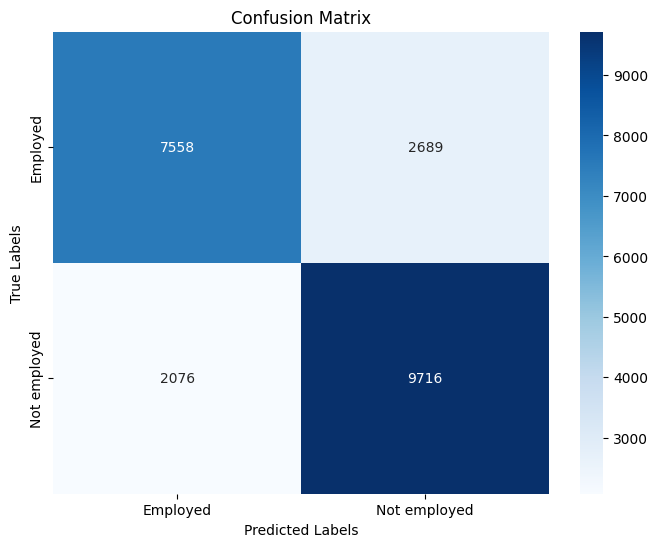

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Assuming y_test are your true labels and y_pred are your predictions

# Create labels for the classes
class_labels = ['Employed', 'Not employed']  # Replace with your actual class names/labels

# Create a heatmap
plt.figure(figsize=(8, 6))  # Can adjust the size as needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and a title
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


INKLUDER FAIRNESS OG INTERPETABILITY MEASURES OG OPSUMER ALLE MODELLER I EN TABEL.

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc
# for fairness assessment
from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate, selection_rate, equalized_odds_difference, demographic_parity_difference, selection_rate

# for mitigation
from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer

In [338]:
# Predict the outcomes using the best RandomForest model

# Generate and display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     10247
           1       0.78      0.82      0.80     11792

    accuracy                           0.78     22039
   macro avg       0.78      0.78      0.78     22039
weighted avg       0.78      0.78      0.78     22039



In [339]:
# Predict the outcomes using the best RandomForest model
y_pred = pipeline.predict(X_test)

# Generate and display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     10247
           1       0.78      0.82      0.80     11792

    accuracy                           0.78     22039
   macro avg       0.78      0.78      0.78     22039
weighted avg       0.78      0.78      0.78     22039



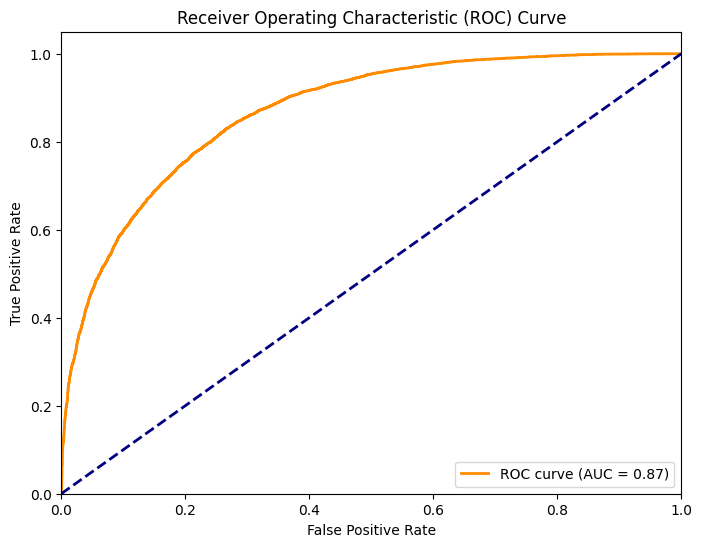

In [340]:
# Step 1: Compute the predicted probabilities for the positive class
y_prob = pipeline.predict_proba(X_test)[:,1]

# Step 2: Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Step 3: Compute the AUC
roc_auc = auc(fpr, tpr)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

For at se fairness så ændr cutoff for at raten a true positive bliver den samme for to grupper. Derved kan du se unfairness hvis de ikke er det samme sted. 